In [19]:
!pip install pandas
!pip install fastdtw

In [33]:
import numpy as np
import pandas as pd
import time
start = time.time()

In [21]:
df = pd.read_table(r"C:\Users\gupye\OneDrive\바탕 화면\온라인교육_논문\activity_accumulator_std_test(0320) (1).csv", sep = '|' ,encoding = 'UTF8')
df = df.drop([938212], axis = 0) # 이상한 데이터 삭제

In [22]:
#학번이 숫자로만 이루어진 학생들만 filter
df['digit'] = df.user_id.str.isnumeric()
df = df[df['digit'].isin([True])]
df

,user_pk1,user_id,event_type,course_pk1,course_id,course_name,content_pk1,forum_pk1,group_pk1,internal_handle,data,timestamp,digit
0,844698,2018190413,COURSE_ACCESS,190110,20201R0136HISE34900,201R [학부]역사교과교육론(THEORIES OF HISTORY EDUCATION...,-999,340970,-999,discussion_board_entry,토론방,2020-03-20 23:59:58,True
1,843312,2018271239,COURSE_ACCESS,191345,NaN,NaN,2923415,-999,-999,-999,/webapps/assignment/uploadAssignment,2020-03-20 23:59:58,True
2,992294,2020170668,COURSE_ACCESS,195135,20201R0136GEWR00123,201R [학부]글쓰기(COLLEGE WRITING)-23분반,-999,350951,-999,-999,Discussion Board Reply,2020-03-20 23:59:58,True
3,849385,2018431036,PAGE_ACCESS,-999,NaN,NaN,-999,-999,-999,-999,/webapps/portal/execute/tabs/tabAction,2020-03-20 23:59:58,True
4,990057,2020130039,COURSE_ACCESS,195115,20201R0136GEWR00103,201R [학부]글쓰기(COLLEGE WRITING)-03분반,-999,347435,-999,db_thread_list_entry,포럼: 학생 자료실,2020-03-20 23:59:58,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938207,807517,2017010530,COURSE_ACCESS,188392,NaN,NaN,-999,-999,-999,-999,mobile.view.grades,2020-03-20 00:31:56,True
938208,995339,2020400802,COURSE_ACCESS,195314,NaN,NaN,2925621,-999,-999,content,국제스포츠학부 교육과정 소개,2020-03-20 00:31:55,True
938209,941750,2019442037,COURSE_ACCESS,188808,NaN,NaN,-999,338747,-999,db_thread_list_entry,포럼: 학생 자료실,2020-03-20 00:31:55,True
938210,990176,2020130324,COURSE_ACCESS,186611,NaN,NaN,2870029,-999,-999,content,Course Materials,2020-03-20 00:31:55,True


In [23]:
#count
test = df.groupby(['user_id','timestamp']).count().reset_index()
test = test[['user_id','timestamp','data']].sort_values(by  = 'user_id', ascending = True)
test['timestamp'] = pd.to_datetime(test['timestamp'])
test = test.pivot(index = 'timestamp', columns = 'user_id', values = 'data')

print("time :", time.time() - start)

In [24]:
# 시간 단위로 Downsampling
mi = test.resample(rule = '1H').sum().transpose()

mi
print("time :", time.time() - start)

timestamp,2020-03-20 00:00:00,2020-03-20 01:00:00,2020-03-20 02:00:00,2020-03-20 03:00:00,2020-03-20 04:00:00,2020-03-20 05:00:00,2020-03-20 06:00:00,2020-03-20 07:00:00,2020-03-20 08:00:00,2020-03-20 09:00:00,...,2020-03-20 14:00:00,2020-03-20 15:00:00,2020-03-20 16:00:00,2020-03-20 17:00:00,2020-03-20 18:00:00,2020-03-20 19:00:00,2020-03-20 20:00:00,2020-03-20 21:00:00,2020-03-20 22:00:00,2020-03-20 23:00:00
user_id,,,,,,,,,,,,,,,,,,,,,
2001010056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003020195,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004130964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004170889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,6.0,53.0,0.0,0.0,0.0,6.0,2.0,0.0,3.0
2004520038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020951851,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,...,0.0,0.0,0.0,5.0,6.0,2.0,0.0,0.0,0.0,0.0
2020951856,14.0,3.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020951865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,12.0,0.0,0.0,0.0,0.0,16.0,10.0,0.0,0.0


In [35]:
# matrix normalization
from sklearn.preprocessing import StandardScaler

matrix = np.array(mi, dtype = np.int32)

# 10개만 일단 테스트
matrix1 = matrix[:10]
matrix1 = StandardScaler().fit_transform(matrix1) #z-normalization

print("time :", time.time() - start)
matrix1

time : 8.607187986373901


array([[-0.33333333,  0.        , -0.33333333,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.        , -0.5       ,
        -0.33333333, -0.33333333,  0.        ,  0.        , -0.33333333,
        -0.33333333, -0.34027607, -0.33333333, -0.5       ,  0.        ,
        -0.33333333, -0.33333333,  0.        , -0.33333333],
       [-0.33333333,  0.        ,  3.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.33333333, -0.5       ,
        -0.33333333, -0.33333333,  0.        ,  0.        , -0.33333333,
        -0.33333333, -0.34027607, -0.33333333, -0.5       ,  0.        ,
        -0.33333333, -0.33333333,  0.        , -0.33333333],
       [-0.33333333,  0.        , -0.33333333,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.33333333,  2.        ,
        -0.33333333, -0.33333333,  0.        ,  0.        , -0.33333333,
        -0.33333333, -0.34027607, -0.33333333, -0.5       ,  0.        ,
  

In [36]:
#DTW 함수정의
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist = euclidean)
    return distance

print("time :", time.time() - start)

time : 21.109219789505005


In [27]:
dist_pairs = []

for i in range(len(matrix1)):
    for j in range(len(matrix1)):
        dist = dtw_dist(matrix1[i], matrix1[j])
        dist_pairs.append((i,j,dist))
        
print("time :", time.time() - start)

In [28]:
dist_frame = pd.DataFrame(dist_pairs, columns = ['A','B','Dist'])
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B','Dist']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]
sfe

,A,B,Dist
0,0,1,2.333333
1,0,2,1.500000
2,0,3,15.007472
3,0,4,3.229681
4,0,5,1.000000
5,0,6,3.847219
6,0,7,6.500000
7,0,8,4.180552
8,0,9,1.500000
10,1,2,3.166667


In [29]:
# 시각화 확인
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

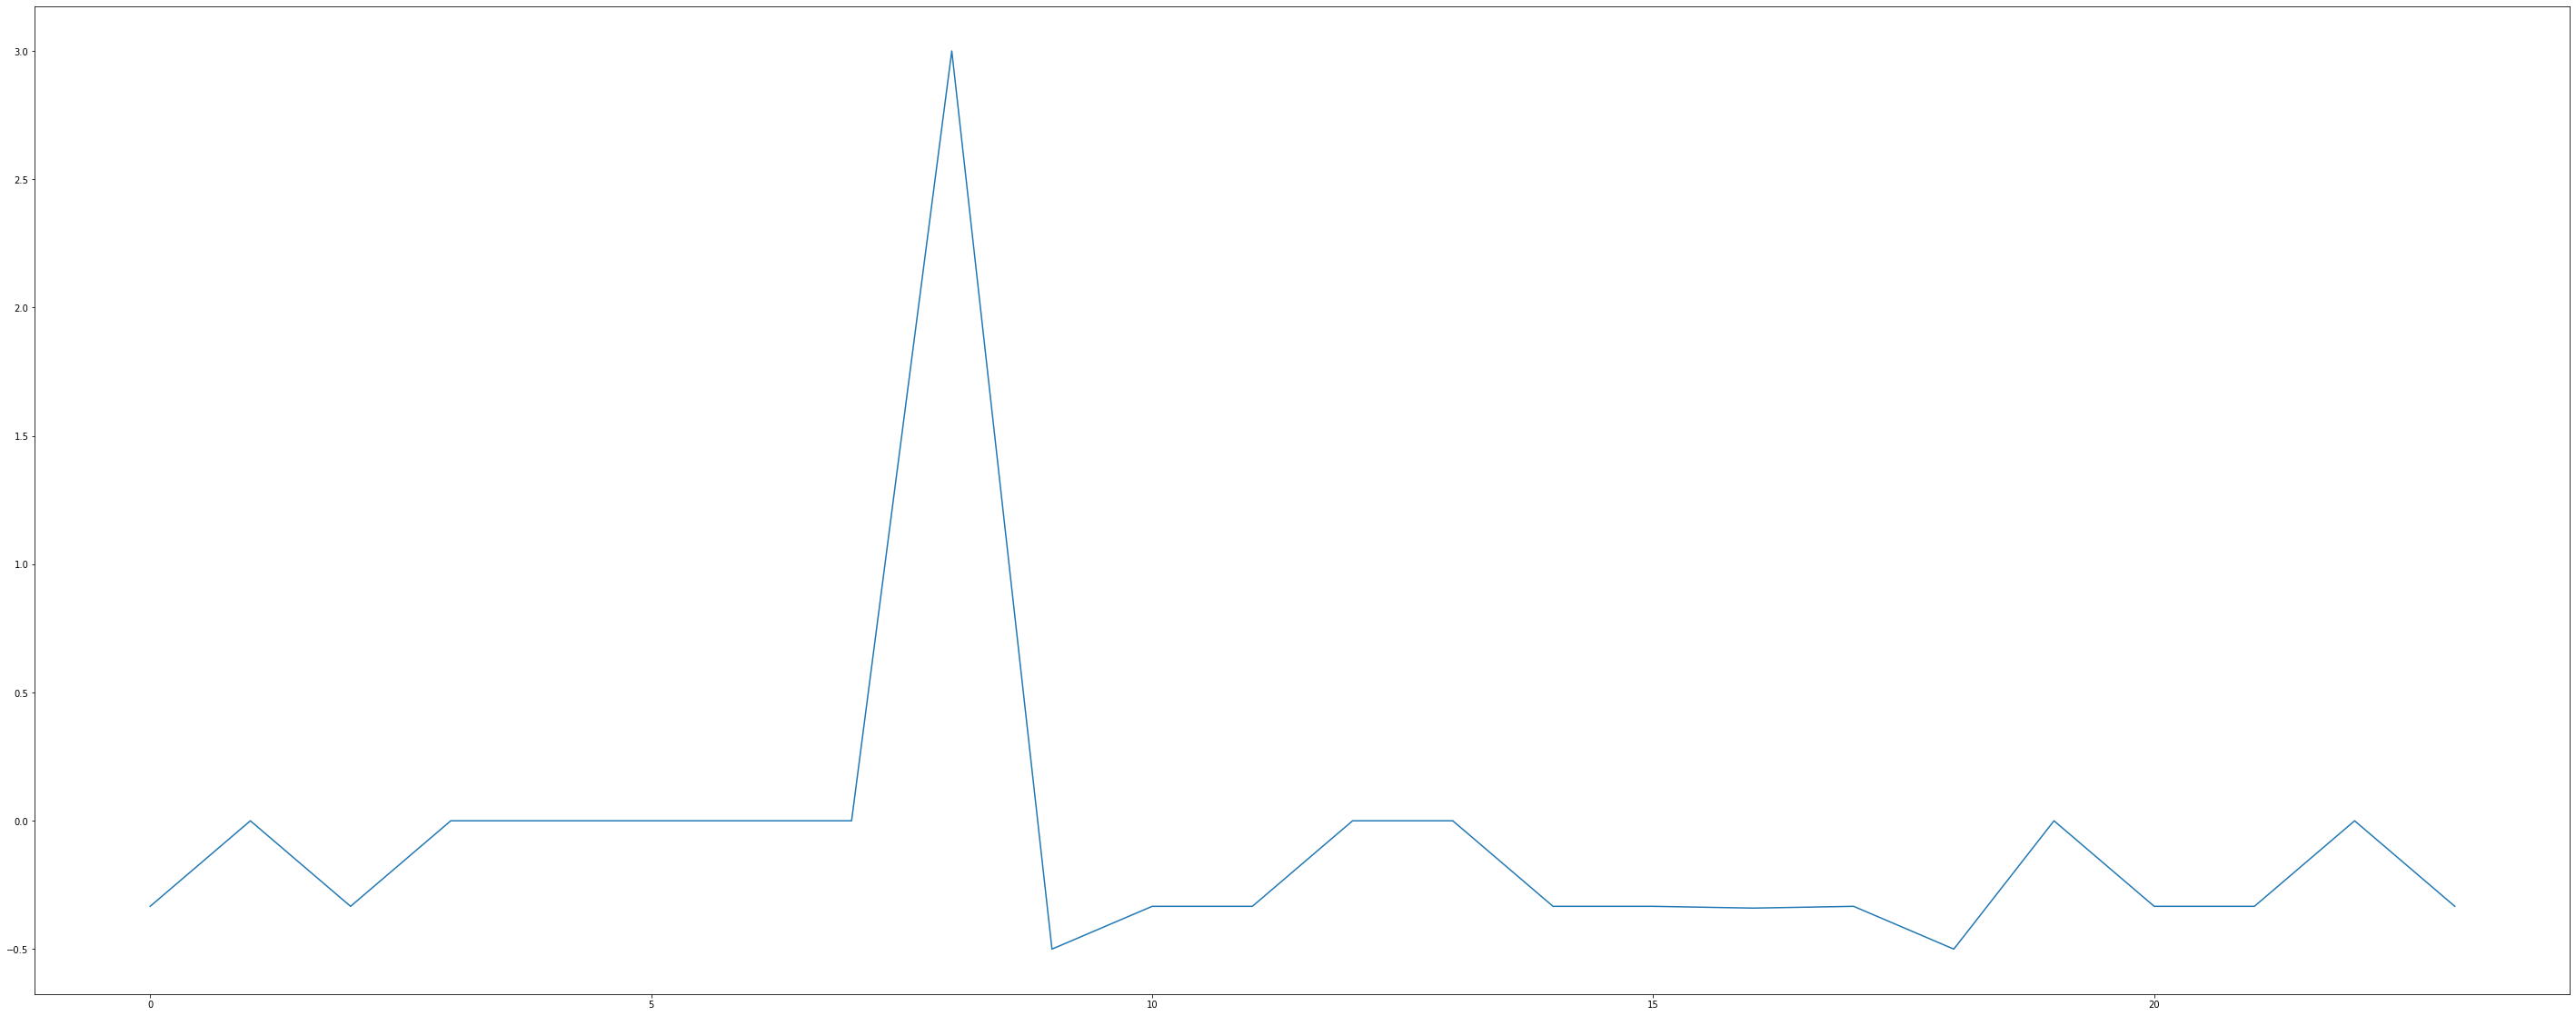

In [30]:
plt.figure(figsize = (50, 20))
plt.plot(matrix1[0])

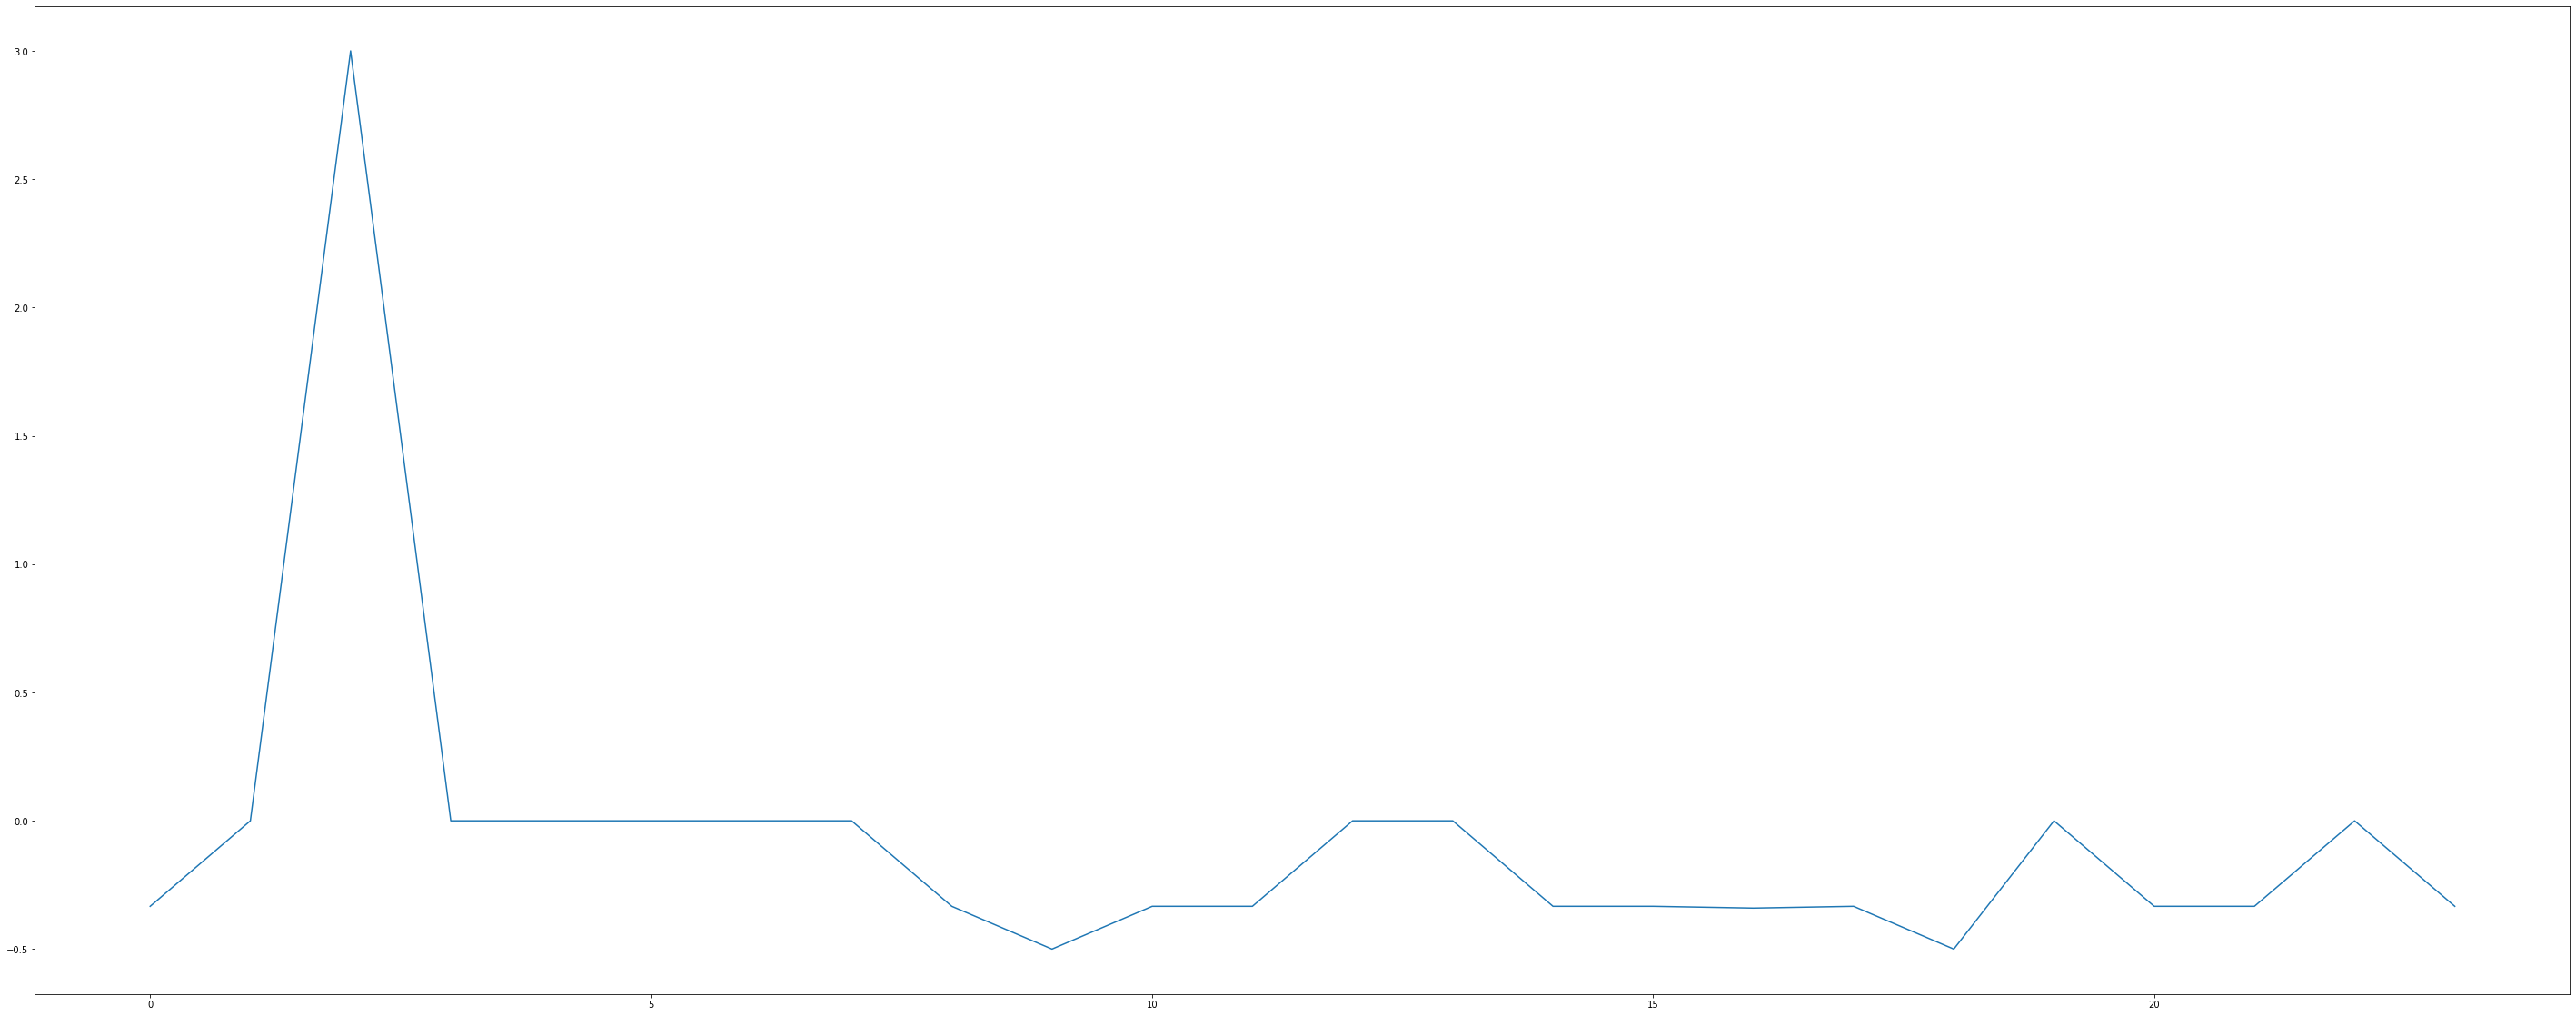

In [31]:
plt.figure(figsize = (50, 20))
plt.plot(matrix1[1])

In [ ]:
#결과 저장
sfe.to_csv(r"C:\Users\gupye\OneDrive\바탕 화면\온라인교육_논문\result.csv", encoding = 'utf8')